In [4]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.patches as matplotlib_patches
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import timeit
from PIL import Image
from functions_v1 import *
from scipy import ndimage as ndi
from skimage import feature



In [15]:
def load_image_pil(infilename, bw=False):
    ''' Read an image from a directory
    INPUTS: 
        infilename: Name of the image (include directory)
        bw = Boolean (1 color image, 0 black and white)
    OUTPUT: 
        data = image file (float 32)
    '''
    img = Image.open(infilename)
    if bw:
        img = img.convert('L')
        
    img = np.array(img)

    return img

# Load Data

In [16]:
#### Lad Data
# Loaded a set of images
root_dir = "datas/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
files.sort()
n = min(100, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images")
#Read it with PIL as black and white and then change it to numpy array
imgs = [load_image(image_dir + files[i]) for i in range(n)]
bw_imgs = [load_image_pil(image_dir + files[i], bw=True) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " groundtruth")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

n = 100 # Only use 10 images for training


Loading 100 images
satImage_001.png
Loading 100 groundtruth
satImage_001.png


# Scharr edge detection

(400, 400)

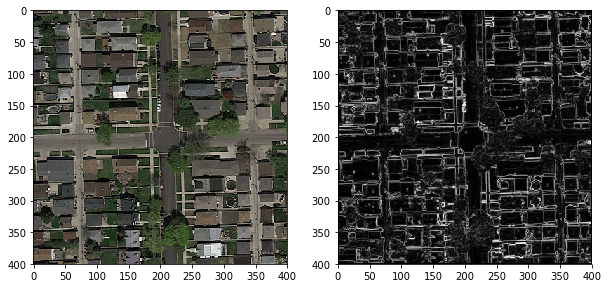

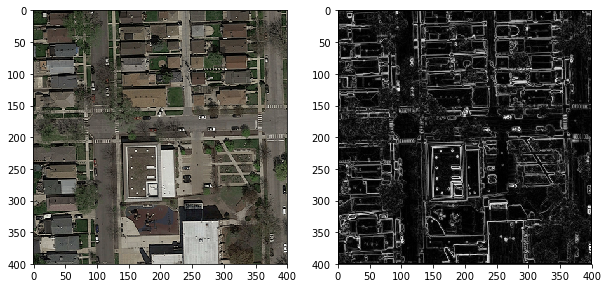

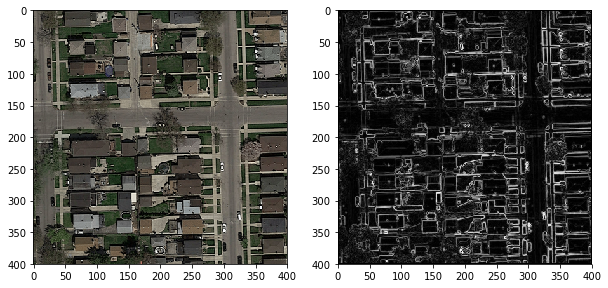

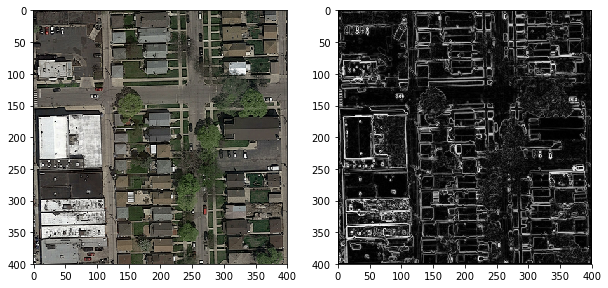

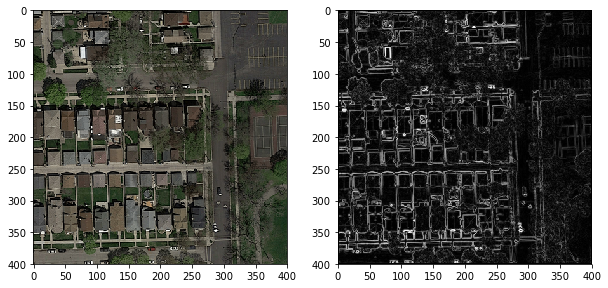

In [17]:
from skimage.filters import scharr

n = 5

for i in range(5):
    bw = bw_imgs[i]
    im = imgs[i]
    
    elevation_map = scharr(bw)

    fig1 = plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(im);
    plt.subplot(1, 2, 2)
    plt.imshow(elevation_map, cmap='Greys_r');

im.shape
elevation_map.shape